In [ ]:
from glob import glob 
import numpy as np
import pandas as pd
import keras,cv2,os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPool2D
from keras.callbacks import ModelCheckpoint
from tqdm import tqdm_notebook,trange
import matplotlib.pyplot as plt
import gc
from keras.applications.resnet50 import ResNet50
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

In [ ]:
#map images and labels
path = "Z:/DSBA/DL/Project/" 
train_path = path + 'train/'
df = pd.DataFrame({'path': glob(os.path.join(train_path,'*.tif'))})
#print(df)
df['id'] = df.path.map(lambda x: x.split('\\')[1].split(".")[0]) 
#print(df)
labels = pd.read_csv(path+"train_labels.csv") 
df = df.merge(labels, on = "id") 
print(df) 

                                                     path  \
0       Z:/DSBA/DL/Project/train\00001b2b5609af42ab0ab...   
1       Z:/DSBA/DL/Project/train\000020de2aa6193f4c160...   
2       Z:/DSBA/DL/Project/train\00004aab08381d25d3153...   
3       Z:/DSBA/DL/Project/train\0000d563d5cfafc4e68ac...   
4       Z:/DSBA/DL/Project/train\0000da768d06b879e5754...   
...                                                   ...   
220020  Z:/DSBA/DL/Project/train\fffe6c73afcf5f5da5818...   
220021  Z:/DSBA/DL/Project/train\fffeb3f5361ea57e728fb...   
220022  Z:/DSBA/DL/Project/train\fffeca85b16452a7709d1...   
220023  Z:/DSBA/DL/Project/train\fffeeb1297fd4e26f247a...   
220024  Z:/DSBA/DL/Project/train\ffffe55093358954f38bb...   

                                              id  label  
0       00001b2b5609af42ab0ab276dd4cd41c3e7745b5      1  
1       000020de2aa6193f4c160e398a8edea95b1da598      0  
2       00004aab08381d25d315384d646f5ce413ea24b1      0  
3       0000d563d5cfafc4e68acb7c982

In [ ]:
#function to load images and labels
def load_data(N,df):
    X = np.zeros([N,96,96,3],dtype=np.uint8) 
    y = np.squeeze(df.as_matrix(columns=['label']))[0:N]
    for i, row in tqdm_notebook(df.iterrows(), total=N):
        print(row)
        if i == N:
            break
        X[i] = cv2.imread(row['path'])
          
    return X,y

In [ ]:
N=10564
X,y = load_data(N=N,df=df) 

label= 1


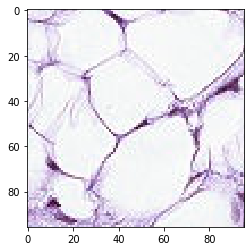

label= 0


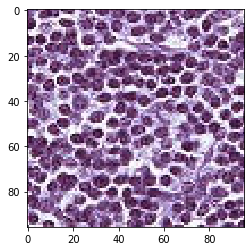

label= 0


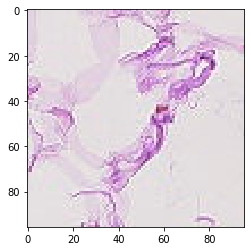

label= 0


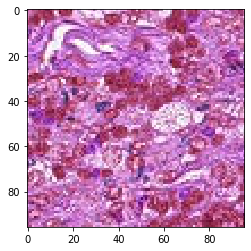

label= 1


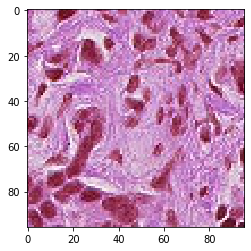

In [ ]:
import random
for i in range(5):
    j=random.randint(100,2500)
    print('label=',y[j])
    plt.imshow(X[j])
    plt.show()

In [ ]:
#count positive and negative samples
label1=(y==1).sum()
label0=(y==0).sum()

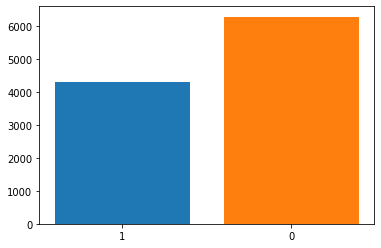

In [ ]:
plt.bar('1',label1)
plt.bar('0',label0)
plt.show()

In [ ]:
#split data into train and test 
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [ ]:
#define the model
model = Sequential()

model.add(Conv2D(16,kernel_size=3,activation='relu',input_shape=(96,96,3),padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPool2D(2))

model.add(Conv2D(32,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPool2D(2))
model.add(Dropout(0.3))

model.add(Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(Dropout(0.3))
model.add(MaxPool2D(2))

model.add(Conv2D(128,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=3,activation='relu',padding='same'))
model.add(Dropout(0.3))
model.add(MaxPool2D(2))


model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
#clean garbage
positives_samples = None
negative_samples = None
gc.collect()

13277

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#to save the best performing model 
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_accuracy',mode='max', save_best_only=True,verbose=1)
#to stop traing if accuracy stagnates
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)
#to change learning rate when accuracy does stagnate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001,verbose=1,)
#fit model with these conditions 
history=model.fit(xtrain,ytrain,validation_split=0.1, epochs=40 , batch_size=50,verbose=0, callbacks=[es,reduce_lr,checkpoint])



Epoch 00001: val_accuracy improved from -inf to 0.69976, saving model to weights.hdf5

Epoch 00002: val_accuracy improved from 0.69976 to 0.72104, saving model to weights.hdf5

Epoch 00003: val_accuracy did not improve from 0.72104

Epoch 00004: val_accuracy improved from 0.72104 to 0.78842, saving model to weights.hdf5

Epoch 00005: val_accuracy did not improve from 0.78842

Epoch 00006: val_accuracy improved from 0.78842 to 0.79551, saving model to weights.hdf5

Epoch 00007: val_accuracy did not improve from 0.79551

Epoch 00008: val_accuracy did not improve from 0.79551

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00009: val_accuracy improved from 0.79551 to 0.82861, saving model to weights.hdf5

Epoch 00010: val_accuracy did not improve from 0.82861

Epoch 00011: val_accuracy did not improve from 0.82861

Epoch 00012: val_accuracy did not improve from 0.82861

Epoch 00013: val_accuracy did not improve from 0.82861

Epoch 00014: val_accura

In [ ]:
#evaluate model on test data
from keras.models import load_model
modelfinal = load_model('weights.hdf5')
modelfinal.evaluate(xtest, ytest)

2113/2113 [==============================] - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 58s - ETA: 56 - ETA: 54 - ETA: 52 - ETA: 51 - ETA: 49 - ETA: 48 - ETA: 47 - ETA: 45 - ETA: 45 - ETA: 43 - ETA: 43 - ETA: 42 - ETA: 41 - ETA: 40 - ETA: 39 - ETA: 38 - ETA: 37 - ETA: 36 - ETA: 35 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 31 - ETA: 30 - ETA: 29 - ETA: 28 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 24 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 20 - ETA: 19 - ETA: 18 - ETA: 17 - ETA: 16 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 12 - ETA: 11 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 57s 27ms/step


[0.3384523726700044, 0.8518694043159485]

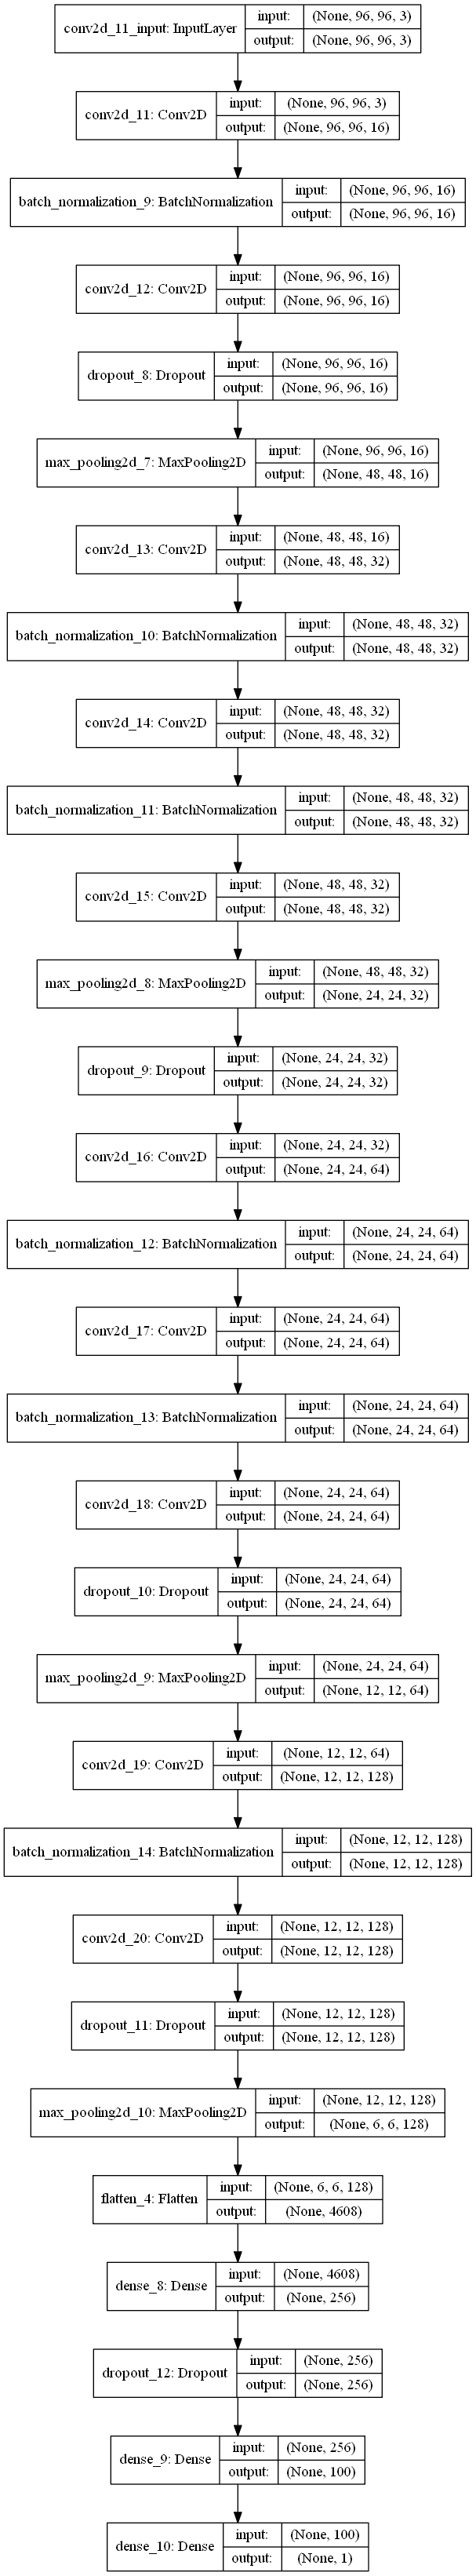

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(modelfinal, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

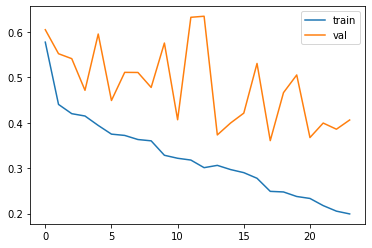

In [ ]:
#plot loss curve
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()
plt.show()

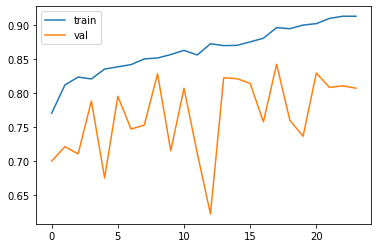

In [ ]:
#plot accuracy cirve
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()
plt.show()

In [ ]:
#visualize kernels and convolutions
conv1 = modelfinal.layers[12]
weights1 = conv1.get_weights()
kernels1 = weights1[0]
kernels1.shape
kernel1_1 = kernels1[:, :,
0, 0]

In [ ]:
plt.imshow(kernel1_1)

In [ ]:
test_image = xtest[365, :, :, 0]
plt.imshow(test_image)

In [ ]:
from astropy.convolution import convolve
filtered_image = convolve(test_image, kernel1_1,normalize_kernel=False)
plt.imshow(filtered_image)